# Malis Project
## La Liga Predictions

### Briefing

This project will try to predict the winner between two different football teams, based on the database containing the results and parameters from the Spanish League "La Liga", from both the 2020-2021 and 2021-2022 period. The database features are as follows:

Player = Full name of the player

"#" = Shirt Number.

Nation = Nationality of the player

Pos = Position played in the match

Age = Age on date of the match (YY-DDD)

Min = Minutes Played

Gls = Goals Scored or allowed

Ast = Assists

PK = Penalty kicks made

PKatt = Penalty kicks attempted

Sh = Shots total (does not include penalty kicks)

SoT = Shots on target (does not include penalty kicks)

CrdY = Yellow cards

CrdR = Red cards

Touches = # of times the player touched the ball

Press = # of times applied pressure to opposing player who is receiving, carrying or releasing the ball

Tkl = # of players tackled

Int = Interceptions

Blocks = # of times blocking the ball by standing on its path

xG = Expected goals (include penalty kicks but don't include penalty shootouts)

npxG = Non-penalty expected goals

xA = xG Assisted (xG which follows a pass that assists a shot)

SCA = Shot creating actions

GCA = Goal creating actions

Cmp = Passes completed

Att = Passes attempted

Cmp% = Pass completition percentage

Prog = Progressive passes

Carries = # of times the player controlled the ball with their feet

Prog.1 = Progressive Passes

Succ = Dribbles completed Successfully

Att.1 = Dribbles attempted

Team = Name of the team

Opponent_Team = Name of the oponent team

Match = Lineup of the team's names for that particular match

Date = Date of the encounter

Stadium = Hosting stadium for the match

Crowd = # of spectators on the stadium

## Exploratory data analysis

In [1]:
#Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Just in case
import warnings
warnings.filterwarnings("ignore")


#Importing both files and merging them as a singular dataframe (DF)
dfx = pd.read_excel("season2020-2021Spain.xlsx")
# dfy = pd.read_excel("season2021-2022Spain.xlsx")
# frames = [dfx, dfy]
# df = pd.concat(frames)
df = dfx
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

#Visualizing the information of the raw DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         12379 non-null  object 
 1   #              11619 non-null  float64
 2   Nation         11619 non-null  object 
 3   Pos            11619 non-null  object 
 4   Age            11619 non-null  object 
 5   Min            12367 non-null  float64
 6   Gls            12379 non-null  int64  
 7   Ast            12379 non-null  int64  
 8   PK             12379 non-null  int64  
 9   PKatt          12379 non-null  int64  
 10  Sh             12379 non-null  int64  
 11  SoT            12379 non-null  int64  
 12  CrdY           12379 non-null  int64  
 13  CrdR           12379 non-null  int64  
 14  Touches        12367 non-null  float64
 15  Press          12367 non-null  float64
 16  Tkl            12367 non-null  float64
 17  Int            12379 non-null  int64  
 18  Blocks

In [2]:
#Visualizing the DF head (20 first elements)
df.head(20)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
5,Kenedy,24.0,br BRA,"RW,LW",25-073,20.0,1,1,0,0,...,4.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
6,Ángel Montoro,19.0,es ESP,CM,32-301,70.0,0,0,0,0,...,23.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
7,Víctor Díaz,16.0,es ESP,"CB,CM",32-314,20.0,0,0,0,0,...,1.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
8,Yangel Herrera,21.0,ve VEN,CM,23-105,90.0,0,0,0,0,...,13.0,2.0,0.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
9,Antonio Puertas,10.0,es ESP,"RM,RW,FW,LW",29-060,90.0,1,1,0,0,...,21.0,0.0,4.0,5.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"


In [3]:
#There are some rows that contain NA values (row #16 contains the summed up stats of the team, 
# we will proceed to drop values with NA's)

df = df.dropna()
df.head(20)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
5,Kenedy,24.0,br BRA,"RW,LW",25-073,20.0,1,1,0,0,...,4.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
6,Ángel Montoro,19.0,es ESP,CM,32-301,70.0,0,0,0,0,...,23.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
7,Víctor Díaz,16.0,es ESP,"CB,CM",32-314,20.0,0,0,0,0,...,1.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
8,Yangel Herrera,21.0,ve VEN,CM,23-105,90.0,0,0,0,0,...,13.0,2.0,0.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"
9,Antonio Puertas,10.0,es ESP,"RM,RW,FW,LW",29-060,90.0,1,1,0,0,...,21.0,0.0,4.0,5.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"<span style=""display:inline-block"">Santiago Ja...","Estadio Nuevo Los Cármenes, Granada"


In [4]:
#Visualizing the DF's feature informtion to spot nulls/NA's
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11498 entries, 0 to 12377
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         11498 non-null  object 
 1   #              11498 non-null  float64
 2   Nation         11498 non-null  object 
 3   Pos            11498 non-null  object 
 4   Age            11498 non-null  object 
 5   Min            11498 non-null  float64
 6   Gls            11498 non-null  int64  
 7   Ast            11498 non-null  int64  
 8   PK             11498 non-null  int64  
 9   PKatt          11498 non-null  int64  
 10  Sh             11498 non-null  int64  
 11  SoT            11498 non-null  int64  
 12  CrdY           11498 non-null  int64  
 13  CrdR           11498 non-null  int64  
 14  Touches        11498 non-null  float64
 15  Press          11498 non-null  float64
 16  Tkl            11498 non-null  float64
 17  Int            11498 non-null  int64  
 18  Blocks

In [5]:
#Regrouping the DF to spot the teams confronting each other
df_versus = df.groupby(["Match","Date","Team"], as_index=False)["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR","Touches",
                                                         "Press","Tkl", "Int", "Blocks"].sum()

df_versus

#We now need to create an additional column for the results of each encounter (Win/Loss/Draw).

,Match,Date,Team,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0
4,Alavés_vs_Barcelona,2020-10-31,Alavés,1,0,0,0,4,3,4,1,373.0,222.0,24.0,10,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Villarreal_vs_Sevilla,2021-05-16,Villarreal,4,2,0,0,12,5,0,0,524.0,120.0,15.0,6,16.0
756,Villarreal_vs_Valencia,2020-10-18,Valencia,1,1,0,0,11,3,1,0,497.0,91.0,14.0,4,23.0
757,Villarreal_vs_Valencia,2020-10-18,Villarreal,2,0,1,1,15,5,4,1,719.0,94.0,10.0,3,17.0
758,Villarreal_vs_Valladolid,2020-11-02,Valladolid,0,0,0,0,11,1,3,0,497.0,121.0,22.0,4,14.0


In [6]:
#Generating the additional column

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_index(drop=True)

test = []

for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    b = (oi.Gls[0])-(oi.Gls[1]) #Goals + Goals of the other team
    if b < 0:
        a = 0 #Assigned to losers
        b = 1 #Assigned to winners
        test.append(a)
        test.append(b)
    elif b > 0:
        a = 1 #Assigned to winners
        b = 0 #Assigned to losers
        test.append(a)
        test.append(b)
    else:
        a = 2 #Assigned when result is a draw
        b = 2 #Assigned when result is a draw
        test.append(a)
        test.append(b)        

        
test = pd.DataFrame(test)
df_versus["Results"] = test


#Visualizing the DF with the "Results" Column
df_versus.head(25)

,Match,Date,Team,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,Results
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0,1
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0,0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0,1
4,Alavés_vs_Barcelona,2020-10-31,Alavés,1,0,0,0,4,3,4,1,373.0,222.0,24.0,10,25.0,2
5,Alavés_vs_Barcelona,2020-10-31,Barcelona,1,0,0,0,25,8,3,0,989.0,85.0,19.0,4,7.0,2
6,Alavés_vs_Celta_Vigo,2021-04-04,Alavés,1,0,0,0,17,8,4,0,533.0,131.0,14.0,17,3.0,0
7,Alavés_vs_Celta_Vigo,2021-04-04,Celta Vigo,3,3,0,0,8,6,5,1,459.0,190.0,22.0,5,16.0,1
8,Alavés_vs_Cádiz,2021-03-13,Alavés,1,0,1,1,8,1,3,1,504.0,188.0,6.0,6,9.0,2
9,Alavés_vs_Cádiz,2021-03-13,Cádiz,1,0,1,1,8,0,3,0,485.0,98.0,11.0,12,9.0,2


In [7]:
#Adding the Home/Away Column

o = []
for i,j in zip(df_versus.Match,df_versus.Team):
    a = i.split("_vs")
    a = a[0].replace("_"," ")
    if a == j:
        a="Home"
    else:
        a="Away"
    o.append(a)

test = pd.DataFrame(o)
df_versus["Home/Away"] = test

#Visualizing the updated DF
df_versus

,Match,Date,Team,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,Results,Home/Away
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0,1,Home
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0,0,Away
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0,0,Home
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0,1,Away
4,Alavés_vs_Barcelona,2020-10-31,Alavés,1,0,0,0,4,3,4,1,373.0,222.0,24.0,10,25.0,2,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Villarreal_vs_Sevilla,2021-05-16,Villarreal,4,2,0,0,12,5,0,0,524.0,120.0,15.0,6,16.0,1,Home
756,Villarreal_vs_Valencia,2020-10-18,Valencia,1,1,0,0,11,3,1,0,497.0,91.0,14.0,4,23.0,0,Away
757,Villarreal_vs_Valencia,2020-10-18,Villarreal,2,0,1,1,15,5,4,1,719.0,94.0,10.0,3,17.0,1,Home
758,Villarreal_vs_Valladolid,2020-11-02,Valladolid,0,0,0,0,11,1,3,0,497.0,121.0,22.0,4,14.0,0,Away


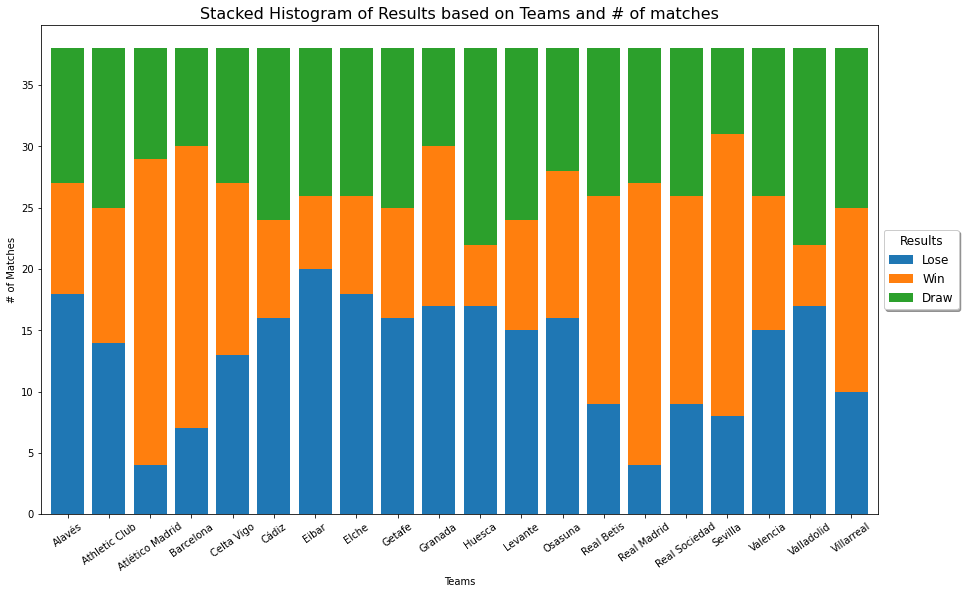

In [31]:
#Visualizing the Stacked Histogram (Using df.plot())
df_plot = df_versus.groupby(["Team", "Results"]).size().reset_index().pivot(columns="Results" , 
                                                                            index="Team", values=0)
df_plot.plot(kind="bar", stacked=True, figsize =(15,9),
rot=35,width=.8)
plt.title("Stacked Histogram of Results based on Teams and # of matches",size=16)
plt.legend(["Lose","Win","Draw"], title="Results",loc="center left",
bbox_to_anchor=(1, 0, 0.5, 1),fontsize = "large",
shadow = True,title_fontsize="large")

plt.xlabel("Teams")
plt.ylabel("# of Matches")
plt.show()
